# ５章 検定

In [1]:
options(repr.plot.width =5 , repr.plot.height = 5)

In [2]:
d <- read.csv('data3a.csv')
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 4.513941

## パラメトリック・ブーストラップ法

In [3]:
d$y.rnd = rpois(100, lambda = mean(d$y))
fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
fit1$deviance - fit2$deviance

[1] 0.1552188

以上、帰無仮説（一定モデル）を仮定して、逸脱度の差を計算するのが、PB法の1ステップに相当する。これを繰り返すことで、逸脱度の差の分布を得ることができる。


In [4]:
get.dd <- function(d) {
    n.sample <- nrow(d)
    y.mean <- mean(d$y)
    d$y.rnd <- rpois(n.sample, lambda = y.mean)
    fit1 <- glm(y.rnd ~ 1, data=d, family=poisson)
    fit2 <- glm(y.rnd ~ x, data=d, family=poisson)
    fit1$deviance - fit2$deviance
}

pb <- function(d, n.bootstrap) {
    replicate(n.bootstrap, get.dd(d))
}

dd12 <- pb(d, n.bootstrap = 1000)
summary(dd12)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
 0.000007  0.101634  0.469343  0.934573  1.275106 10.974995 

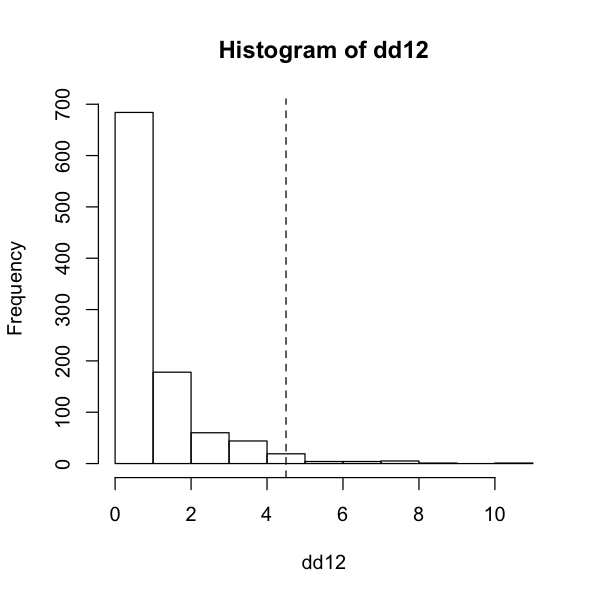

In [5]:
hist(dd12)
abline(v=4.5, lty = 2)

In [6]:
sum(dd12 >= 4.5)

[1] 23

In [7]:
P <- 29 / 1000
P

[1] 0.029

P < 0.05 なので、有意差がある。帰無仮説（一定モデル）は棄却されて x モデルが残るので、これを採択する。

In [8]:
quantile(dd12, 0.95)

95% 
3.523836

In [9]:
fit1 <- glm(y ~ 1, data=d, family=poisson)
fit2 <- glm(y ~ x, data=d, family=poisson)
anova(fit1, fit2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
99,89.50694,NA,NA,NA
98,84.99300,1,4.513941,0.03361969


## ６章：GLM適用範囲の拡大

前章ではGLMは確率分布・リンク関数・線形予測子を指定する統計モデルである

ロジスティック回帰とロジットリンク関数

観察された現象が二項分布で説明できそうな時に使うモデル

ポアソン分布と違い上限のあるカウントデータ

種子の生存確率$q_i$：ある個体iから得られた１個の種子が生きている確率

ロジスティック関数の関数形
$$q_i = logistic(z_i) = \frac{1}{1+exp(-z_i)}$$

$$z_i =  \beta_1 + \beta_2x_i+....(線形予測子)$$

In [10]:
d <- read.csv("data4a.csv")

In [11]:
head(d)

N,y,x,f
8,1,9.76,C
8,6,10.48,C
8,5,10.83,C
8,6,10.94,C
8,1,9.37,C
8,1,8.81,C


In [12]:
summary(d)

       N           y              x          f     
 Min.   :8   Min.   :0.00   Min.   : 7.660   C:50  
 1st Qu.:8   1st Qu.:3.00   1st Qu.: 9.338   T:50  
 Median :8   Median :6.00   Median : 9.965         
 Mean   :8   Mean   :5.08   Mean   : 9.967         
 3rd Qu.:8   3rd Qu.:8.00   3rd Qu.:10.770         
 Max.   :8   Max.   :8.00   Max.   :12.440         

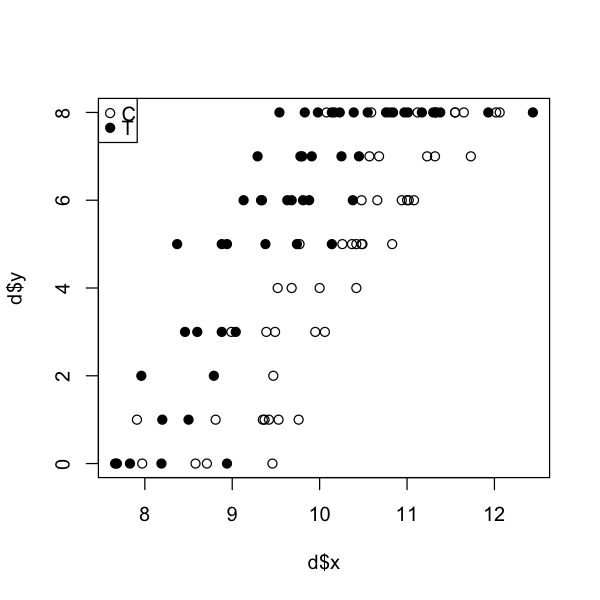

In [13]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
legend("topleft", legend = c("C", "T"), pch = c(21,19))

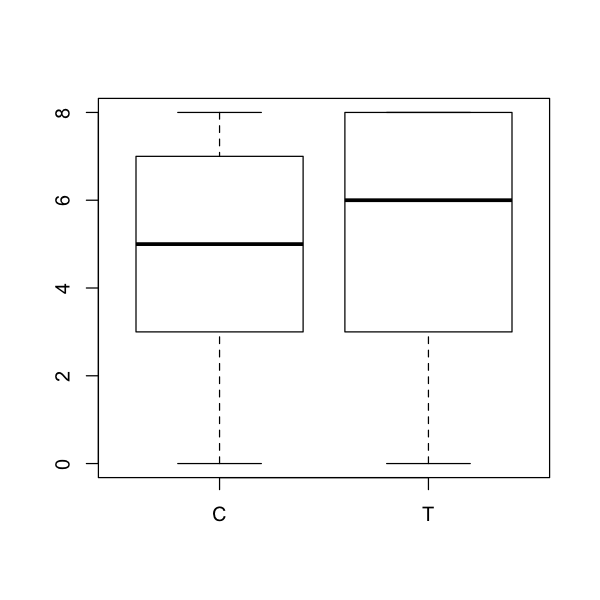

In [14]:
plot(d$f, d$y)

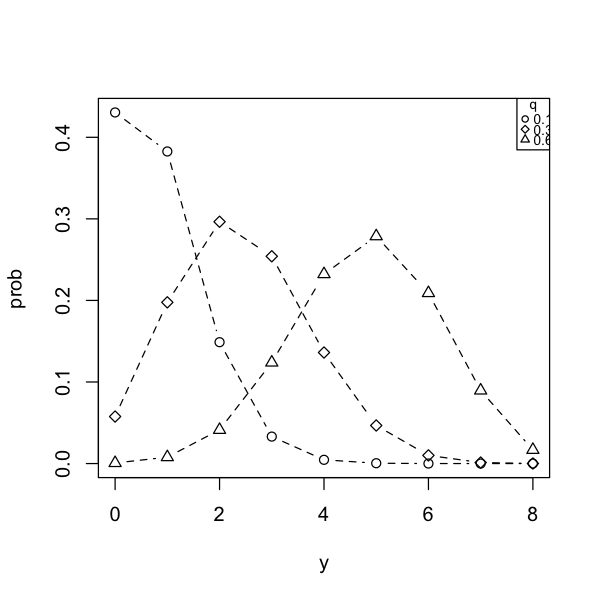

In [15]:
N <- 8
y <- 0:N
plot(y, dbinom(y, N, prob = 0.1), type = "b", lty = 2, pch = 21,ylab = "prob")
lines(y, dbinom(y, N, prob = 0.3), type = "b", lty = 2, pch = 23)
lines(y, dbinom(y, N, prob = 0.6), type = "b", lty = 2, pch = 24)
legend("topright", legend = c(0.1, 0.3, 0.6), pch = c(21, 23, 24),title = "q", cex = 0.7)

In [16]:
logistic <- function(z) 1/(1+exp(-z)) # 関数定義

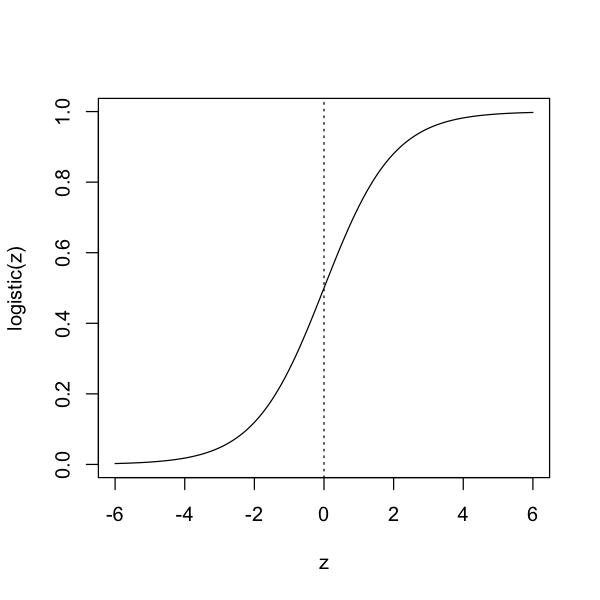

In [17]:
z <- seq(-6, 6, 0.1)
plot(z, logistic(z), type="l")
abline(v = 0, lty = 3)

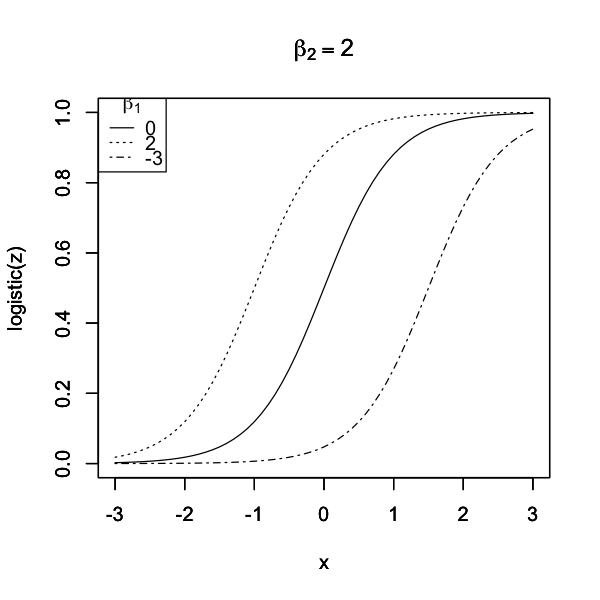

In [18]:
## panel 1
set <- c(2,0,-3)
for ( i in set){
    x <- seq(-3, 3, 0.1)
    z <- i + 2*x
    plot(x, logistic(z), type="l", ylim = c(0,1), lty=abs(i)+1,
        main=expression(beta[2]==2))
    par(new=T)}
legend("topleft", legend = c(0,2,-3), lty = c(1,3,4),
       title = expression(beta[1]))

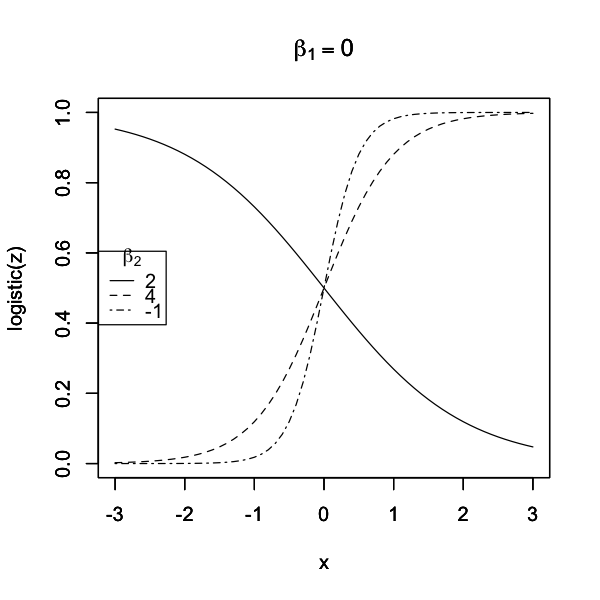

In [19]:
## panel 2
set <- c(-1,2,4)
for ( i in set){
    x <- seq(-3, 3, 0.1)
    z <- i*x
    plot(x, logistic(z), type='l', ylim = c(0,1),lty=abs(i),
        main=expression(beta[1]==0))
    par(new=T)}
legend("left", legen =c(2,4,-1),lty=c(1,2,4),title=expression(beta[2]))

$q_i$と$x_i$の関係がパラメーター$\beta$に依存している

このロジスティック関数を変形すると

$$\log\frac{q_i}{1-q_i} = z_i$$

この左辺をロジット関数という

$$logit(q_i) = \log\frac{q_i}{1-q_i}$$

## パラメータ推定

尤度関数
$$L(\{\beta_j\})=\prod_i{}_{N_i} C_{y_i}q^{y_i}_i(1-q_i)^{N_i-y_i}$$

から対数尤度
$$logL(\{\beta_j\}) = \sum_i\{log{}_{N_i} C_{y_i}+y_ilog(q_i)+(N_i-y_i)log(1-q_i)\}$$

In [20]:
cbind(y, N-y)

y,
0,8
1,7
2,6
3,5
4,4
5,3
6,2
7,1
8,0


In [21]:
rbind(y, N-y)

y,0,1,2,3,4,5,6,7,8
,8,7,6,5,4,3,2,1,0


In [22]:
fit.xf <- glm(cbind(y, N-y) ~ x + f, data =d, family = binomial)

In [23]:
fit.xf


Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

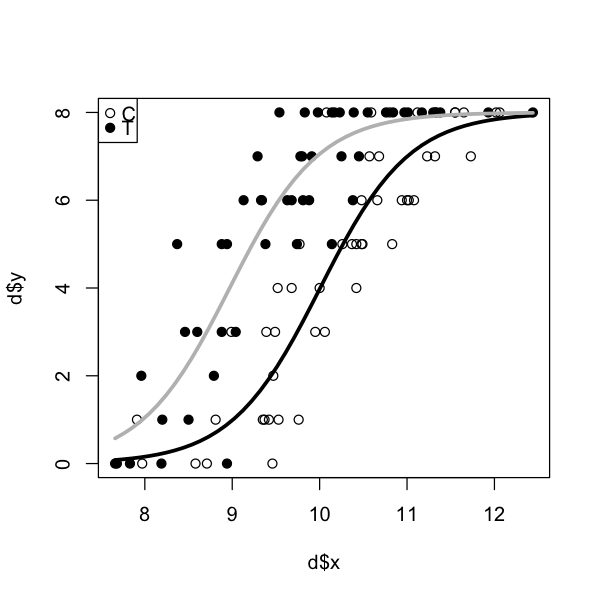

In [24]:
plot(d$x, d$y, pch = c(21, 19)[d$f])
xx <- seq(min(d$x), max(d$x), length = 50)
ff <- factor("C", levels = c("C", "T"))
q <- predict(fit.xf, newdata = data.frame(x = xx, f = ff),type = "response") # predict() を使ってモデルの予測計算
lines(xx, q * 8, lwd = 3)
ff <- factor("T", levels = c("C", "T"))
q <- predict(fit.xf, newdata = data.frame(x = xx, f = ff), type = "response")
lines(xx, q * 8, col = "gray", lwd = 3) # 灰色の曲線
legend("topleft", legend = c("C", "T"), pch = c(21, 19))


$$\log\frac{q_i}{1-q_i} = z_i$$

より

$$\frac{q_i}{1-q_i} = exp(線形予測子）\\
= exp(\beta_1 + \beta_2x_i+\beta_3f_i)$$

比例関係を表すと
$$\frac{q_i}{1-q_i} \propto exp(1.95x_i)exp(2.02f_i)$$
左辺はオッズ(odds)と呼ばれる量（生存する確率/生存しない確率）


$x_i$が一単位増加　⇨　exp(1.95)倍（約７倍）増加

In [25]:
library(MASS) #MASSパッケージの呼び出し

In [26]:
stepAIC(fit.xf)

Start:  AIC=272.21
cbind(y, N - y) ~ x + f

       Df Deviance    AIC
<none>      123.03 272.21
- f     1   217.17 364.35
- x     1   490.58 637.76



Call:  glm(formula = cbind(y, N - y) ~ x + f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT  
    -19.536        1.952        2.022  

Degrees of Freedom: 99 Total (i.e. Null);  97 Residual
Null Deviance:	    499.2 
Residual Deviance: 123 	AIC: 272.2

|モデル|k|logL*|devi|resi devi|AIC|
|:--------:|:-----:|:------:|:-----:|:-:|:-:|
|一定|1|-321.2|642.24|499.2|644.4|
|f|2|-316.9|633.8|490.6|637.8|
|x|2|-180.2|360.3|217.2|364.3|
|x+f|3|-133.1|266.2|123.0|272.2|
|full|100|-71.6|143.2|0.0|343.2|

### 交互作用の入った線形予測子

$$logit(q_i) = \beta_1 + \beta_2x_i + \beta_3f_i + \beta_4x_if_i$$

In [27]:
glm(cbind(y,N-y) ~ x*f,family = binomial, data = d)


Call:  glm(formula = cbind(y, N - y) ~ x * f, family = binomial, data = d)

Coefficients:
(Intercept)            x           fT         x:fT  
  -18.52332      1.85251     -0.06376      0.21634  

Degrees of Freedom: 99 Total (i.e. Null);  96 Residual
Null Deviance:	    499.2 
Residual Deviance: 122.4 	AIC: 273.6

### 割算値や変数変換を避けるオフセット項

ロジスティック回帰モデルのように「N個のうちy個で事象が生じる確率」を明示的に扱う二項分布を使うことで割算値を回避できる。

E.g.

• 森林のあちこちに調査地 100 箇所を設定した ( $i$ ∈ {1, 2, · · · , 100})

• 調査地の面積 $A_i$ はふぞろいである

• また調査地の「明るさ」 $x_i$ を測っている

• 調査地 $i$ における植物個体数 $y_i$

• (解析の目的) 調査地 $i$ における植物個体の「密度」が「明るさ」 $x_i$ に どう影響されてるか知りたい


ポアソン回帰におけるオフセット項わざ

面積が $A_i$ である調査値 $i$ に置ける植物の密度は

$$\frac{平均個体数( \lambda_i )}{A_i}  =  植物密度$$

$$\lambda_i = A_i * 植物密度 = A_i exp(\beta_1 + \beta_2x_i)$$
変形すると
$$\lambda_i = exp(\beta_1 + \beta_2x_i + \log A_i)$$

In [28]:
d <- read.csv("data4b.csv")

In [29]:
str(d)

'data.frame':	100 obs. of  3 variables:
 $ y: int  57 64 49 64 82 29 37 33 61 46 ...
 $ x: num  0.68 0.27 0.46 0.45 0.74 0.15 0.5 0.57 0.79 0.57 ...
 $ a: num  10.3 15.6 10 14.9 14 9.6 11.8 6.8 11.8 9.5 ...


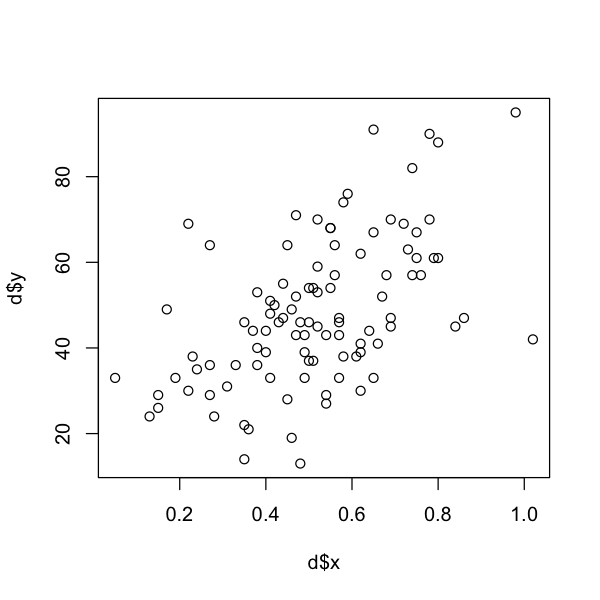

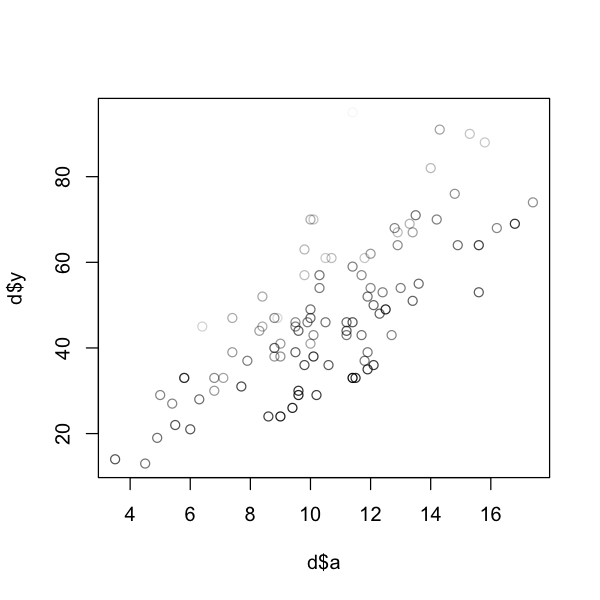

In [30]:
plot(d$x, d$y) # 明るさ vs 個体数
plot(d$a, d$y, col=rgb(0, 0, 0, alpha=1-(d$x-0.02))) # 面積 vs 個体数  

In [31]:
glm(y ~ x, offset = log(a), family = poisson, data = d)


Call:  glm(formula = y ~ x, family = poisson, data = d, offset = log(a))

Coefficients:
(Intercept)            x  
     0.9749       1.0345  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.66 	AIC: 650.4

In [32]:
fit.off <- glm(y ~ x, offset = log(a), family = poisson, data = d)
#plot(d$a, d$y, col=rgb(0, 0, 0, alpha=1-(d$x-0.02))

In [33]:
fit.off


Call:  glm(formula = y ~ x, family = poisson, data = d, offset = log(a))

Coefficients:
(Intercept)            x  
     0.9749       1.0345  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    261.5 
Residual Deviance: 81.66 	AIC: 650.4

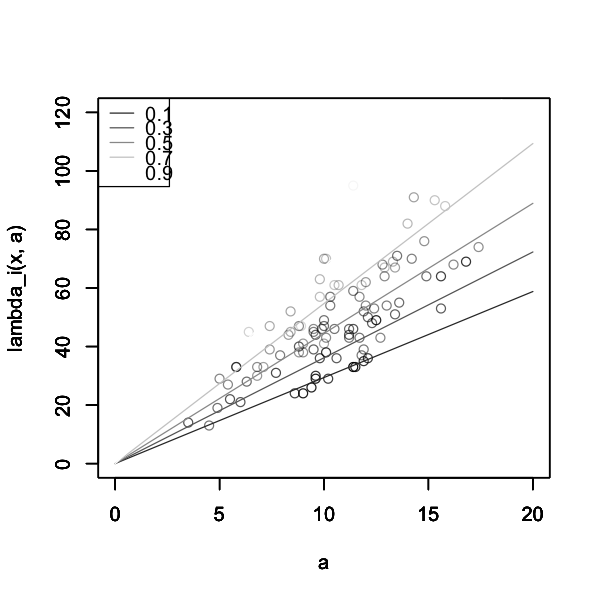

In [34]:
xi <- seq(0.1,0.9,0.2)
a = seq(0,20, length =100)
plot(d$a, d$y, col=rgb(0, 0, 0, alpha=1-(d$x-0.02)), xlim =c(0,20),ylim=c(0,120),ylab="",xlab="")# 面積 vs 個体数
par(new=T)
lambda_i <- function (x, ai) {exp(0.9749 + 1.0345*x + log(ai))} 
for (x in xi){
    plot(a, lambda_i(x, a), type ="l",xlim=c(0,20),ylim=c(0,120) ,col=gray(x+0.1))
    par(new=T)}
legend("topleft", legend=xi, lty=1, col=gray(xi+0.1))

### 正規分布の図示

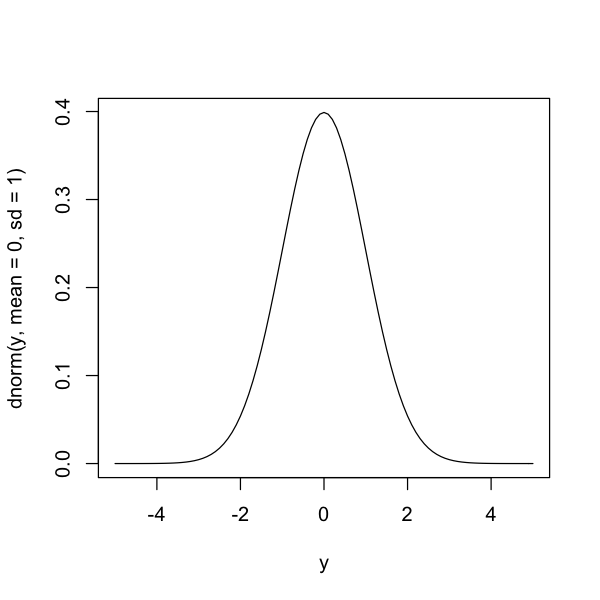

In [35]:
y<- seq(-5, 5, 0.1)
plot(y, dnorm(y, mean=0, sd=1), type="l")

### 正規分布の確率計算

In [36]:
pnorm(1.8,0,1)-pnorm(1.2, 0, 1) # pnorm(x, mu, sd)

[1] 0.07913935

### ガンマ分布のGLM

$$\mu_i = Ax_i^a$$

のとき

$$\mu_i = exp(a)x_i^a = exp(a+b logx_i)$$

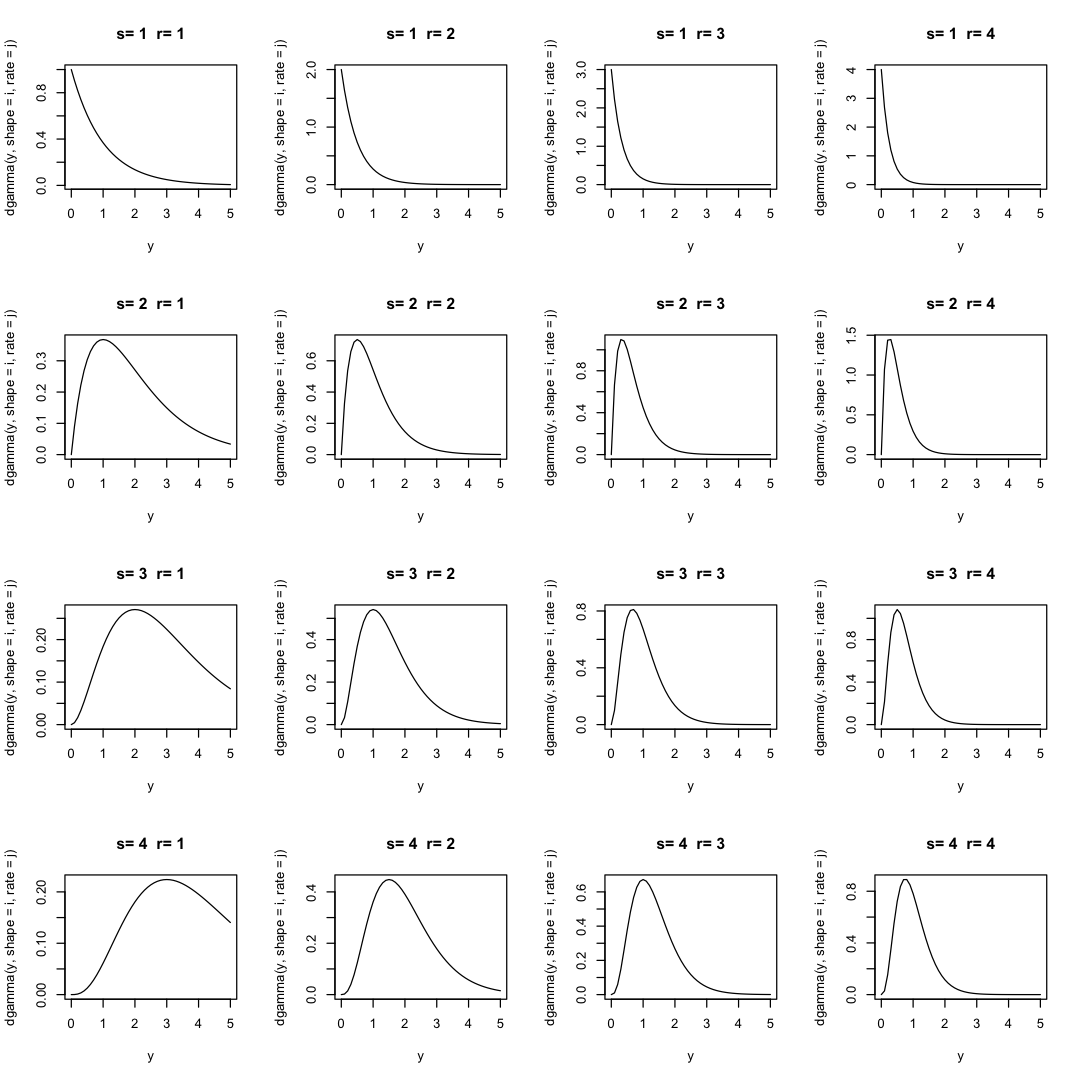

In [44]:
options(repr.plot.width=9, repr.plot.height=9)
par(mfrow=c(4,4))
# ガンマ分布
y <- seq(0, 5, 0.1)

for (i in 1:4) {
    for (j in 1:4){
        plot(y, dgamma(y, shape=i, rate=j), type="l",main=paste('s=',i,'','r=',j))
        }
    }


In [38]:
options(repr.plot.width =5 , repr.plot.height = 5)

In [39]:
d <- read.csv('data4c.csv')

In [40]:
head(d)

x,y
0.00100000,0.0008873584
0.01730612,0.0234652087
0.03361224,0.0698755633
0.04991837,0.0343402528
0.06622449,0.0265204047
0.08253061,0.1592148027


In [41]:
glm(y~log(x), family = Gamma(link="log"), data =d)


Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = d)

Coefficients:
(Intercept)       log(x)  
    -1.0403       0.6833  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    35.37 
Residual Deviance: 17.25 	AIC: -110.9


Call:  glm(formula = y ~ log(x), family = Gamma(link = "log"), data = d)

Coefficients:
(Intercept)       log(x)  
    -1.0403       0.6833  

Degrees of Freedom: 49 Total (i.e. Null);  48 Residual
Null Deviance:	    35.37 
Residual Deviance: 17.25 	AIC: -110.9

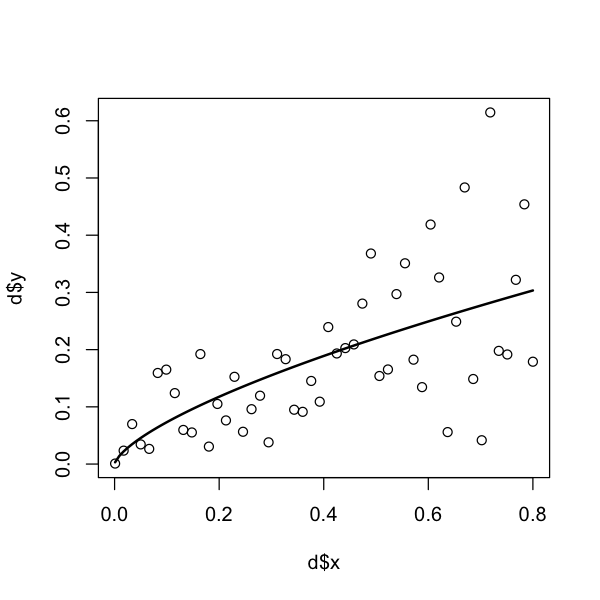

In [42]:
fit <- glm(y ~ log(x), family = Gamma(link = "log"), data = d)
fit
plot(d$x, d$y)
xx <- seq(min(d$x), max(d$x), length=100)
lines(xx, exp(-1.0403 + 0.6833 * log(xx)), lwd = 2)